<a href="https://colab.research.google.com/github/LennyRBriones/neural-networks-practices/blob/main/uploading_multiple_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

--2023-03-29 22:46:55--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  94.6MB/s    in 0.7s    

2023-03-29 22:46:56 (94.6 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [3]:
#decompress
local_zip = "/tmp/databasesLoadData.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/databasesLoadData")
zip_ref.close()

In [4]:
import json
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline 
#We use this command to use matplotlib like in local machines
import matplotlib.pyplot as plt



In [5]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

In [6]:
data_json = []
with codecs.open(url, "rU", "utf-8") as js:
  for line in js:
    data_json.append(json.loads(line))

print ("{} images found".format(len(data_json)))

9 images found


In [7]:
data_json[0]

{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg',
 'label': 'b'}

In [8]:
images = []

for data in data_json:
  response = requests.get(data["content"])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img, data["label"]])


b


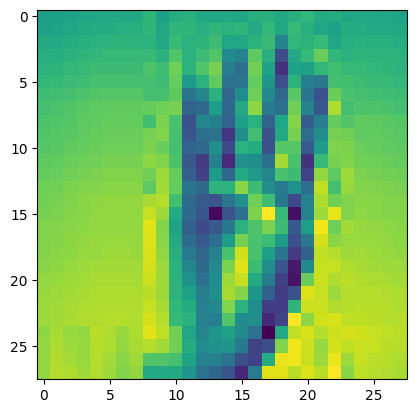

In [9]:
plt.imshow(images[0][0].reshape(28, 28)) #remember that here we are getting the shape as the images
print(images[0][1]) #labels un the number 1

## Reading with Base64

In [10]:
import base64

In [11]:
url = "/tmp/databasesLoadData/sign_mnist_base64/data.json"

In [12]:
with open(url) as f:
  data = json.load(f)

In [13]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [14]:
base64_img_bytes = data["b"].encode("utf-8")
path_img = "/tmp/decode_images.png"
with open(path_img, "wb") as file_to_save:
  decode_image_data = base64.decodebytes(base64_img_bytes)
  file_to_save.write(decode_image_data)

In [15]:
img = Image.open(path_img)
img

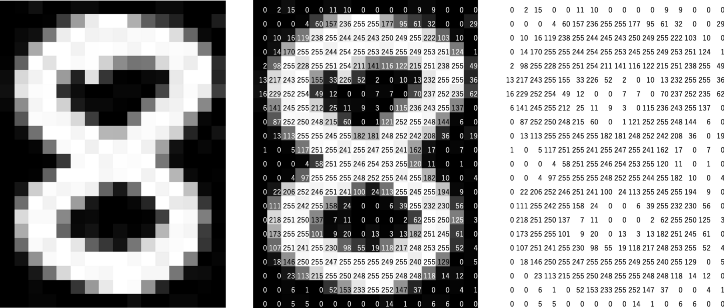

In [16]:
img = Image.open("/tmp/databasesLoadData/pixeles.png")
img

## Using CSV

In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [18]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv")

In [19]:
train.head()
#images 28 x 28

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [20]:
train.shape

(27455, 785)

The train data must not have labels


In [21]:
labels = train["label"].values

In [22]:
train.drop("label", axis = 1, inplace = True)

In [23]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [24]:
images = train.values

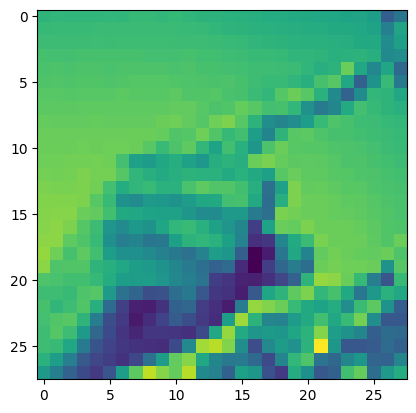

In [25]:
plt.imshow(images[1].reshape(28, 28))

## Data Cleansing and exploring data

In [7]:
train = pd.read_csv('/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv')

<ipython-input-7-ff78bf3a306c>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

<Axes: ylabel='count'>

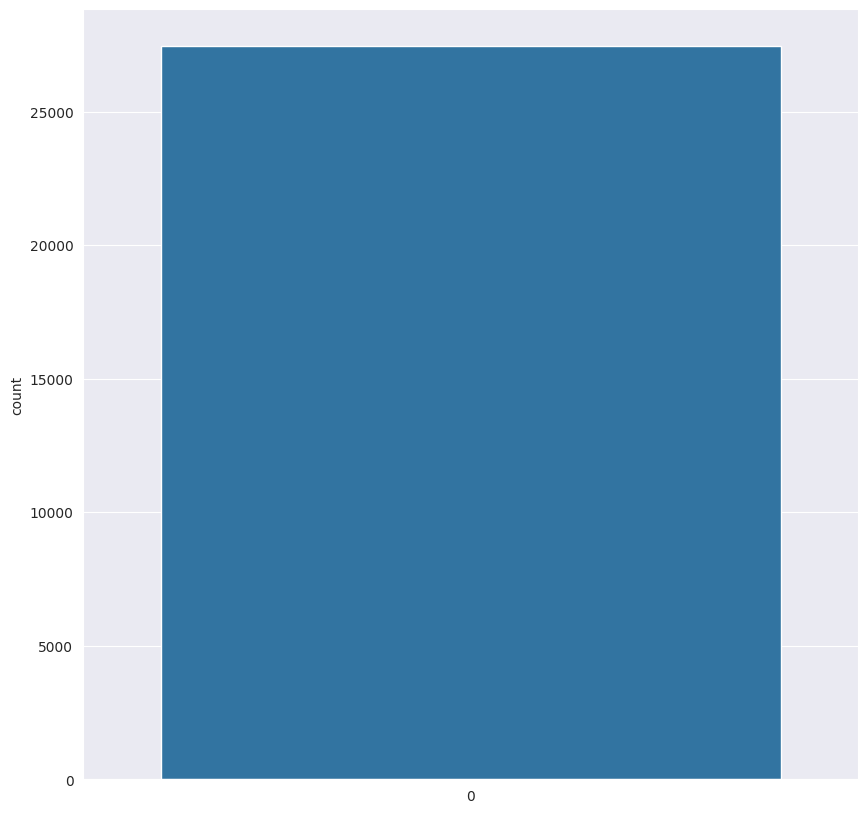

In [8]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.countplot(train['label'])